In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Data Exploration

In [14]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

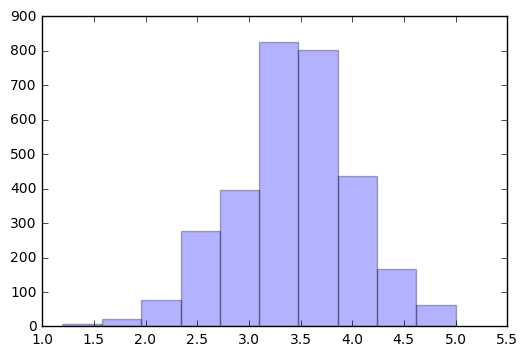

In [15]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [16]:
# Pick Features
non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
categorical_columns = ['industry', 'size range', 'city', ' state', 'country']
# non_categorical_columns = ['trailing_pe', 'leveraged_free_cash_flow', 'operating_cash_flow', 'total_dept_per_equity', 'ebitda', 'net_income_avi_to_common', 'forward_pe', 'total_cash']
# categorical_columns = ['city']

In [17]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# General Functions

In [18]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

def evaluateRegressionModel(model, x, y):
    y_pred = np.clip(model.predict(x), 0, 5).flatten()
    
    # MSE
    print("Mean Square Error:")
    mse = mean_squared_error(y, y_pred)
    print(mse)
    
    # Accuracy
    print("Accuracy:")
    accuracy = sum(np.abs(y_pred - y.values.flatten()) <  0.25)/ y.shape[0]
    print(accuracy)
    
    # Confusion matrix
    y_pred = convertToClass(y_pred, 10)
    y_actual = convertToClass(y, 10)
    confusion_m = confusion_matrix(y_actual, y_pred)
    print("Confusion Matrix:")
    print(confusion_m)
    return (mse, accuracy, confusion_m)

def evaluateClassificationModel(model, x, y):
    y_pred = model.predict(x)
    confusion_m = confusion_matrix(y, y_pred)
    accuracy = model.score(x, y)
    print("Accuracy:")
    print(accuracy)
    print("Confusion Matrix:")
    print(confusion_m)
    return (accuracy, confusion_m)

# REGRESSION MODEL SECTION

# Linear Regression (L1 Regularization)

In [19]:
linRegL1 = linear_model.Lasso(alpha=0.1, normalize=False)
linRegL1.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.32925063398960946
Accuracy:
0.36478243188287923
Confusion Matrix:
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  55   0   0   0]
 [  0   0   0   1   0 237   0   0   0]
 [  0   0   0   0   8 608   1   0   0]
 [  0   0   0   0  10 847   3   2   0]
 [  0   0   0   0   1 482  12   3   0]
 [  0   0   0   0   0 149   2   0   0]
 [  0   0   0   0   0  27   1   0   1]]


In [21]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL1, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.35099722950172574
Accuracy:
0.33983739837398375
Confusion Matrix:
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  12   0   0   0]
 [  0   0   0   0  66   0   0   0]
 [  0   0   0   0 168   1   0   1]
 [  0   0   0   2 181   5   0   1]
 [  0   0   0   1 121   5   0   0]
 [  0   0   0   0  39   1   0   0]
 [  0   0   0   0  10   0   0   0]]


# Linear Regression (L2 Regularization)

In [22]:
# Modeling
linRegL2 = Ridge(alpha=1.0, normalize=False)
linRegL2.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.19081971404662518
Accuracy:
0.5132167547783651
Confusion Matrix:
[[  0   0   1   0   1   0   0   0   0]
 [  0   0   1   4   2   0   0   0   0]
 [  0   0   0  21  22  12   0   0   0]
 [  0   0   0  20 140  75   3   0   0]
 [  0   0   0   2 293 315   7   0   0]
 [  0   0   0   0 109 706  47   0   0]
 [  0   0   0   1  30 336 129   2   0]
 [  0   0   0   0   2  82  63   4   0]
 [  0   0   0   0   1  13   9   5   1]]


In [24]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linRegL2, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.4121987466608482
Accuracy:
0.3105691056910569
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   2   9   1   0   0]
 [  0   0   0   1  22  38   5   0   0]
 [  0   0   0   3  38 111  17   1   0]
 [  0   0   0   1  54 113  19   1   1]
 [  0   0   0   0  24  82  21   0   0]
 [  1   0   0   1   4  28   5   1   0]
 [  0   0   0   0   1   9   0   0   0]]


# Linear Regression

In [25]:
# Modeling
linReg = LinearRegression().fit(x_train, y_train)

In [26]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.17939873659221292
Accuracy:
0.5839772265148434
Confusion Matrix:
[[  0   1   0   1   0   0   0   0   0]
 [  0   3   1   1   2   0   0   0   0]
 [  0   0  14  11  18  12   0   0   0]
 [  0   0   3  87  78  64   6   0   0]
 [  0   0   0  23 320 256  18   0   0]
 [  0   0   0   3 152 601 104   2   0]
 [  0   0   0   2  44 230 208  14   0]
 [  0   0   0   0   3  61  47  39   1]
 [  0   0   0   0   1  10   7   2   9]]


In [27]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(linReg, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.5306993010523338
Accuracy:
0.2975609756097561
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  1 10  0  0  0]
 [ 0  0  1  2  4 22 23 12  2  0]
 [ 0  0  0  1 12 46 84 23  2  2]
 [ 0  0  2  1  8 58 82 29  8  1]
 [ 0  1  0  0  5 25 67 24  3  2]
 [ 1  0  0  1  2  6 19 10  1  0]
 [ 0  0  0  0  0  3  6  1  0  0]]


# Support Vector Regression

In [28]:
# Modeling
svr = SVR().fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Training Data
print("ON TRAINING DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_train, y_train)

ON TRAINING DATA:
Mean Square Error:
0.034357744476146555
Accuracy:
0.9385929239528263
Confusion Matrix:
[[  0   0   0   2   0   0   0   0   0]
 [  0   0   0   7   0   0   0   0   0]
 [  0   0   0  54   1   0   0   0   0]
 [  0   0   0 174  64   0   0   0   0]
 [  0   0   0  14 439 159   3   2   0]
 [  0   0   0   5   2 840   2  13   0]
 [  0   0   0   1   2 150 340   5   0]
 [  0   0   0   0   0   0  43 108   0]
 [  0   0   0   0   0   0   0  29   0]]


In [30]:
# ON TEST DATA
print("ON TEST DATA:")
mse, accuracy, confusion_m = evaluateRegressionModel(svr, x_test, y_test)

ON TEST DATA:
Mean Square Error:
0.34726092786022145
Accuracy:
0.3382113821138211
Confusion Matrix:
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  12   0   0   0]
 [  0   0   0   0  66   0   0   0]
 [  0   0   0   2 168   0   0   0]
 [  0   0   0   1 188   0   0   0]
 [  0   0   0   0 127   0   0   0]
 [  0   0   0   0  40   0   0   0]
 [  0   0   0   0  10   0   0   0]]


# CLASSIFICATION MODEL SECTION

In [31]:
k = 10
y_train = convertToClass(y_train, k)
y_test = convertToClass(y_test, k)
print("Ran.")

Ran.


# Softmax

In [32]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.31394875965839775
Confusion Matrix:
[[  0   0   0   0   1   0   1   0   0]
 [  0   0   0   0   1   5   1   0   0]
 [  0   0   0   0   5  36  14   0   0]
 [  0   0   0   0  28 174  36   0   0]
 [  1   0   0   0  45 432 136   3   0]
 [  0   1   0   0  74 574 211   2   0]
 [  0   0   0   0  36 307 152   3   0]
 [  0   0   0   0  16  91  43   1   0]
 [  1   0   0   0   2  17   9   0   0]]


In [34]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(softmax, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.2991869918699187
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   3   8   1   0   0]
 [  0   0   0   0   3  45  18   0   0]
 [  1   0   0   0  11 132  26   0   0]
 [  0   0   0   0  13 130  44   1   1]
 [  0   0   0   0  12  72  43   0   0]
 [  0   0   0   0   6  27   7   0   0]
 [  0   0   0   0   0   6   4   0   0]]


# Support Vector Machine, Kernel = rbf

In [41]:
svm_rbf = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.8999593330622204
Confusion Matrix:
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  55   0   0   0]
 [  0   0   0 236   0   2   0   0   0]
 [  0   0   0   0 617   0   0   0   0]
 [  0   0   0   0   0 862   0   0   0]
 [  0   0   0   0   0   2 496   0   0]
 [  0   0   0   0   0 149   0   2   0]
 [  0   0   0   0   0  29   0   0   0]]


In [43]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.3073170731707317
Confusion Matrix:
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  12   0   0   0]
 [  0   0   0   0  66   0   0   0]
 [  0   0   0   0 170   0   0   0]
 [  0   0   0   0 189   0   0   0]
 [  0   0   0   0 127   0   0   0]
 [  0   0   0   0  40   0   0   0]
 [  0   0   0   0  10   0   0   0]]


# Support Vector Machine, Kernel = linear

In [38]:
svm_linear = SVC(gamma = 'auto', kernel='linear', C=1, max_iter=5000)
svm_linear.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.12118747458316388
Confusion Matrix:
[[  0   0   0   0   1   0   0   0   1]
 [  0   0   0   1   6   0   0   0   0]
 [  0   2   3   9  24   0   0   0  17]
 [  0   5   9  36 103   1   1   3  80]
 [  1  11  39 136 224  12   0   3 191]
 [  4  22  53 202 291  22   2   5 261]
 [  1  10  33 105 164  25   1   2 157]
 [  0   5   8  31  57   1   1   2  46]
 [  0   0   2   4  12   0   1   0  10]]


In [40]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_linear, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.15121951219512195
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  6  0  0  0  5]
 [ 0  0  4 21 22  0  1  0 18]
 [ 0  5  7 43 62  3  0  1 49]
 [ 1  9 10 49 61  6  1  1 51]
 [ 1  4  4 32 38  5  2  0 41]
 [ 0  0  2 10 18  1  0  0  9]
 [ 0  0  0  0  7  1  0  0  2]]


# Decision Trees

In [44]:
tree = tree.DecisionTreeClassifier(max_depth = 15)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.8344855632370882
Confusion Matrix:
[[  2   0   0   0   0   0   0   0   0]
 [  0   4   0   2   0   0   1   0   0]
 [  0   0  33   3   2   8   9   0   0]
 [  0   0   0 170  18  31  15   4   0]
 [  0   0   0  13 529  53  21   1   0]
 [  0   0   2  14  47 777  18   4   0]
 [  0   0   1  11  21  50 413   2   0]
 [  0   0   2   1   9  28  11 100   0]
 [  0   0   0   0   0   1   4   0  24]]


In [46]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(tree, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.2780487804878049
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  3  4  3  2  0]
 [ 0  0  0 10 18 25 12  1  0]
 [ 0  0  2 26 41 56 35  8  2]
 [ 0  1  1 15 36 86 46  3  1]
 [ 0  0  0 15 25 50 31  3  3]
 [ 0  0  2  5 15  9  7  2  0]
 [ 1  0  1  0  2  1  3  1  1]]


# Linear Discriminant Analysis

In [47]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [48]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.7031313542090281
Confusion Matrix:
[[  1   0   0   0   0   1   0   0   0]
 [  0   6   0   0   1   0   0   0   0]
 [  0   0  37   2   8   4   3   1   0]
 [  0   0   1 155  33  21  22   6   0]
 [  0   0   1  11 482  51  61  10   1]
 [  0   1   6  26 134 560 120  12   3]
 [  0   0   2   6  56  45 382   6   1]
 [  0   0   0   0  25  19  18  89   0]
 [  0   0   0   1   4   2   5   0  17]]


In [49]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(lda, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.25853658536585367
Confusion Matrix:
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1 10 21 17 13  4  0]
 [ 0  3 16 55 43 40 12  1]
 [ 0  6 15 58 53 49  7  1]
 [ 0  1  6 34 37 39 10  0]
 [ 0  1  2 14 10 11  2  0]
 [ 0  0  0  3  3  3  1  0]]


# QDA

In [52]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [53]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(qda, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.3688491256608377
Confusion Matrix:
[[  2   0   0   0   0   0   0   0   0]
 [  0   5   0   0   2   0   0   0   0]
 [  0   0  45   4   0   1   5   0   0]
 [  0   0   0 207   0  12  19   0   0]
 [  0   0   0  76  52  31 138   2 318]
 [  0   1   2  87   9 126 195  10 432]
 [  0   1   0  20   4  27 353   2  91]
 [  0   0   0   5   1   6  26  97  16]
 [  0   0   0   1   0   1   7   0  20]]


In [54]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(qda, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.11056910569105691
Confusion Matrix:
[[  0   0   0   0   0   0   0   1]
 [  0   0   1   0   0   3   0   8]
 [  0   0   9   0   2  12   1  42]
 [  0   1  13   4  12  46   1  93]
 [  0   0  25   4  12  39   4 105]
 [  0   0  12   1   8  35   1  70]
 [  0   1   4   1   4   7   0  23]
 [  0   0   0   0   0   2   0   8]]


# K Nearest Neighbors

In [55]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [56]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.4021960146400976
Confusion Matrix:
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2   5   0   0   0]
 [  0   0   0   3  17  33   1   1   0]
 [  0   0   0  17  70 141   9   1   0]
 [  0   0   2  12 249 303  50   1   0]
 [  0   0   1  18 171 605  66   1   0]
 [  0   0   0  14 118 249 117   0   0]
 [  0   0   0   5  40  83  22   1   0]
 [  0   0   0   0   5  21   3   0   0]]


In [57]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(neigh, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.2975609756097561
Confusion Matrix:
[[  0   0   0   1   0   0   0   0]
 [  0   0   0   7   3   2   0   0]
 [  0   0   0  24  34   8   0   0]
 [  0   0   5  51  99  15   0   0]
 [  0   0   5  45 115  24   0   0]
 [  0   0   2  31  77  17   0   0]
 [  0   0   2  10  21   7   0   0]
 [  0   0   0   3   7   0   0   0]]


# PCA

In [69]:
pca = PCA(n_components=5)
x_train_new = pca.fit_transform(x_train)
X_test_new = pca.transform(x_test)

In [70]:
svm_rbf_pca = SVC(gamma = 'auto', kernel='rbf', C=.8)
svm_rbf_pca.fit(x_train_new, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_train_new, y_train)

ON TRAINING DATA:
Accuracy:
0.8283855225701505
Confusion Matrix:
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   1   5   1   0   0]
 [  0   0   0   1   5  48   1   0   0]
 [  0   0   0 187  20  23   8   0   0]
 [  0   0   0   1 564  49   3   0   0]
 [  0   0   0   2   4 853   3   0   0]
 [  0   0   0   0  24  45 429   0   0]
 [  0   0   0   2  13 120  12   4   0]
 [  0   0   0   0   4  24   1   0   0]]


In [72]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(svm_rbf_pca, x_test_new, y_test)

ON TESTING DATA:
Accuracy:
0.3073170731707317
Confusion Matrix:
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  12   0   0   0]
 [  0   0   0   0  66   0   0   0]
 [  0   0   0   0 170   0   0   0]
 [  0   0   0   0 189   0   0   0]
 [  0   0   0   0 127   0   0   0]
 [  0   0   0   0  40   0   0   0]
 [  0   0   0   0  10   0   0   0]]


# Neural Networks

In [76]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=1)
nn.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [77]:
# Training data
print("ON TRAINING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_train, y_train)

ON TRAINING DATA:
Accuracy:
0.20211468076453842
Confusion Matrix:
[[  0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   7   0   0]
 [  0   0   0   0   0   0  55   0   0]
 [  0   0   0   0   0   0 238   0   0]
 [  3   0   0   0   0   0 613   1   0]
 [  1   0   0   0   1   0 860   0   0]
 [  1   0   0   0   0   0 497   0   0]
 [  0   0   0   0   0   0 151   0   0]
 [  1   0   0   0   0   0  28   0   0]]


In [78]:
# Testing data
print("ON TESTING DATA:")
accuracy, confusion_m = evaluateClassificationModel(nn, x_test, y_test)

ON TESTING DATA:
Accuracy:
0.208130081300813
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  12   0   0]
 [  0   0   0   0   0   0  66   0   0]
 [  1   0   0   0   1   0 168   0   0]
 [  1   0   0   0   0   0 188   0   0]
 [  0   0   0   0   0   0 127   0   0]
 [  0   0   0   0   0   0  40   0   0]
 [  0   0   0   0   0   0  10   0   0]]


In [ ]:
# Hidden layers: 20, 10, and 5 worked well